<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_0_8_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_0.8_n20.csv',
 'data_add_delta_0.8_n30.csv',
 'data_add_delta_0.8_n60.csv',
 'data_add_delta_0.8_n120.csv',
 'data_add_delta_0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.579034,29.986895,55.762320,21.389518,167.717767,145.968391,21.749376
1,0.0,1.0,38.467485,29.301930,61.170224,-10.197398,128.742242,137.778232,-9.035991
2,0.0,2.0,81.464839,63.904378,21.087371,-6.628896,169.827692,172.769752,-2.942060
3,0.0,3.0,93.432868,93.640528,98.716474,68.177495,363.967366,308.738155,55.229211
4,0.0,4.0,25.990486,23.298809,58.204332,7.330187,124.823814,113.957259,10.866554
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,75.993857,34.415125,56.028384,8.713379,185.150745,185.305706,-0.154960
29996,999.0,26.0,90.264087,26.764355,95.573337,-3.439080,219.162699,229.671027,-10.508328
29997,999.0,27.0,32.015323,43.812963,41.931962,8.596100,136.356348,130.360421,5.995926
29998,999.0,28.0,48.669765,42.380439,62.710593,-0.419399,163.341398,166.369183,-3.027785


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.579034,29.986895,55.762320,21.389518,167.717767,145.968391,21.749376
1,0.0,1.0,38.467485,29.301930,61.170224,-10.197398,128.742242,137.778232,-9.035991
2,0.0,2.0,81.464839,63.904378,21.087371,-6.628896,169.827692,172.769752,-2.942060
3,0.0,3.0,93.432868,93.640528,98.716474,68.177495,363.967366,308.738155,55.229211
4,0.0,4.0,25.990486,23.298809,58.204332,7.330187,124.823814,113.957259,10.866554
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,75.993857,34.415125,56.028384,8.713379,185.150745,185.305706,-0.154960
29996,999.0,26.0,90.264087,26.764355,95.573337,-3.439080,219.162699,229.671027,-10.508328
29997,999.0,27.0,32.015323,43.812963,41.931962,8.596100,136.356348,130.360421,5.995926
29998,999.0,28.0,48.669765,42.380439,62.710593,-0.419399,163.341398,166.369183,-3.027785


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    50.579034  29.986895  55.762320  ...  167.717767  145.968391  21.749376
      1.0    38.467485  29.301930  61.170224  ...  128.742242  137.778232  -9.035991
      2.0    81.464839  63.904378  21.087371  ...  169.827692  172.769752  -2.942060
      3.0    93.432868  93.640528  98.716474  ...  363.967366  308.738155  55.229211
      4.0    25.990486  23.298809  58.204332  ...  124.823814  113.957259  10.866554
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   75.993857  34.415125  56.028384  ...  185.150745  185.305706  -0.154960
      26.0   90.264087  26.764355  95.573337  ...  219.162699  229.671027 -10.508328
      27.0   32.015323  43.812963  41.931962  ...  136.356348  130.360421   5.995926
      28.0   48.669765  42.380439  62.710593  ...  163.341398  166.369183  -3.027785
      29.0   90.524105  55.757060  42.784216  ...  189.939825  208.390252 -18.450427

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    50.579034  29.986895  55.762320  ...  167.717767  145.968391  21.749376
      1.0    38.467485  29.301930  61.170224  ...  128.742242  137.778232  -9.035991
      2.0    81.464839  63.904378  21.087371  ...  169.827692  172.769752  -2.942060
      3.0    93.432868  93.640528  98.716474  ...  363.967366  308.738155  55.229211
      4.0    25.990486  23.298809  58.204332  ...  124.823814  113.957259  10.866554
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   75.993857  34.415125  56.028384  ...  185.150745  185.305706  -0.154960
      26.0   90.264087  26.764355  95.573337  ...  219.162699  229.671027 -10.508328
      27.0   32.015323  43.812963  41.931962  ...  136.356348  130.360421   5.995926
      28.0   48.669765  42.380439  62.710593  ...  163.341398  166.369183  -3.027785
      29.0   90.524105  55.757060  42.784216  ...  189.939825  208.390252 -18.450427

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.579034,29.986895,55.762320,21.389518,167.717767,145.968391,21.749376
1,0.0,1.0,38.467485,29.301930,61.170224,-10.197398,128.742242,137.778232,-9.035991
2,0.0,2.0,81.464839,63.904378,21.087371,-6.628896,169.827692,172.769752,-2.942060
3,0.0,3.0,93.432868,93.640528,98.716474,68.177495,363.967366,308.738155,55.229211
4,0.0,4.0,25.990486,23.298809,58.204332,7.330187,124.823814,113.957259,10.866554
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,75.993857,34.415125,56.028384,8.713379,185.150745,185.305706,-0.154960
29996,999.0,26.0,90.264087,26.764355,95.573337,-3.439080,219.162699,229.671027,-10.508328
29997,999.0,27.0,32.015323,43.812963,41.931962,8.596100,136.356348,130.360421,5.995926
29998,999.0,28.0,48.669765,42.380439,62.710593,-0.419399,163.341398,166.369183,-3.027785


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    50.579034  29.986895  55.762320  ...  167.717767  145.968391  21.749376
      1.0    38.467485  29.301930  61.170224  ...  128.742242  137.778232  -9.035991
      2.0    81.464839  63.904378  21.087371  ...  169.827692  172.769752  -2.942060
      3.0    93.432868  93.640528  98.716474  ...  363.967366  308.738155  55.229211
      4.0    25.990486  23.298809  58.204332  ...  124.823814  113.957259  10.866554
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   75.993857  34.415125  56.028384  ...  185.150745  185.305706  -0.154960
      26.0   90.264087  26.764355  95.573337  ...  219.162699  229.671027 -10.508328
      27.0   32.015323  43.812963  41.931962  ...  136.356348  130.360421   5.995926
      28.0   48.669765  42.380439  62.710593  ...  163.341398  166.369183  -3.027785
      29.0   90.524105  55.757060  42.784216  ...  189.939825  208.390252 -18.450427

[30000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

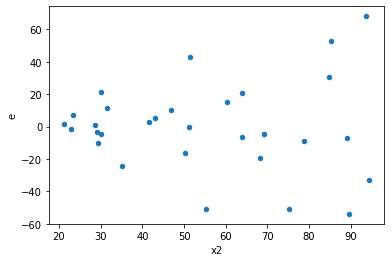

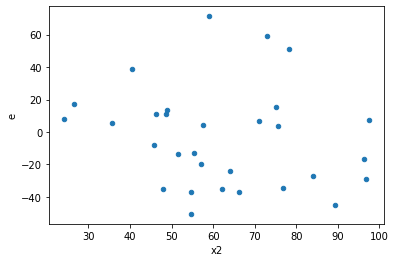

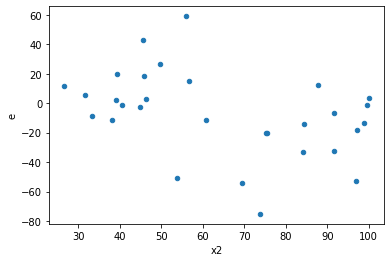

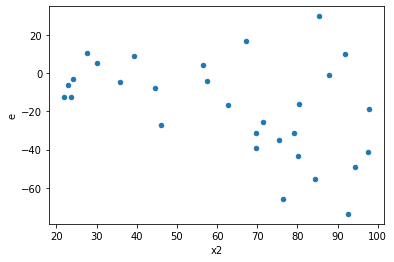

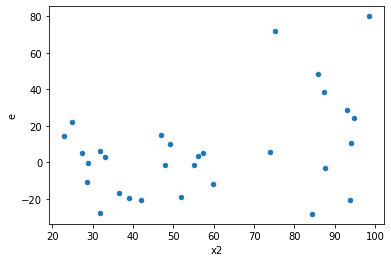

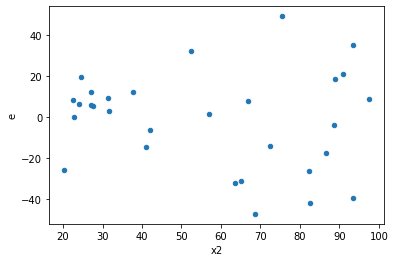

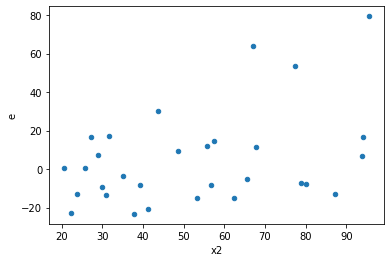

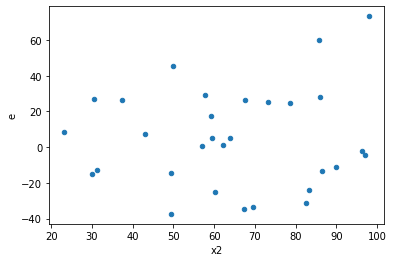

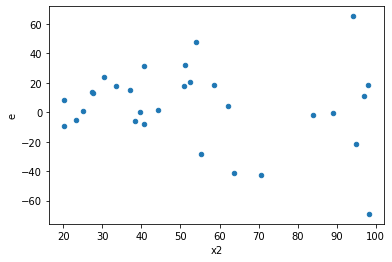

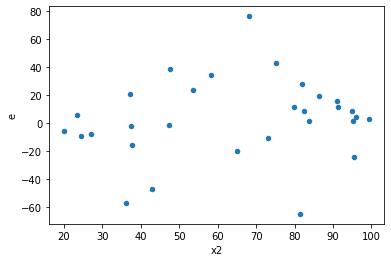

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,9.0,9.0,14257.038494829298,1241.7738248923738,1782.1298118536622,155.22172811154672,11.481187804924922,0.001219441018755596,0.9993902794906222,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,10616.71166182097,2842.5162500429606,1327.0889577276212,355.31453125537007,3.73496955792619,0.06275587895363555,0.9686220605231822,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,2301.015391026721,1791.0595965988598,287.6269238783401,223.88244957485747,1.284722962539183,0.7150538158205915,0.6424730920897043,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,8779.029753111487,1127.9843245557613,1097.3787191389358,140.99804056947016,7.782935952207463,0.005342288881733603,0.9973288555591332,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,9943.159494085303,1436.591365528142,1242.8949367606629,179.57392069101775,6.921355461739005,0.008177270386561908,0.995911364806719,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,6621.869732099594,1624.8625823086788,827.7337165124493,203.10782278858485,4.075341388372019,0.04816019398291349,0.9759199030085433,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,5891.550319320096,951.0326686556455,736.443789915012,118.87908358195568,6.194897939361258,0.012106667684128825,0.9939466661579356,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,10139.391789418467,4446.349790622151,1267.4239736773084,555.7937238277689,2.2803855447458448,0.2353141886379535,0.8823429056810232,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,11026.287660263426,1357.2462956133347,1378.2859575329283,169.65578695166684,8.124013818199952,0.004560782702024202,0.9977196086489879,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,14257.038494829298,1241.7738248923738,1782.1298118536622,155.22172811154672,11.481187804924922,0.001219441018755596,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,10616.71166182097,2842.5162500429606,1327.0889577276212,355.31453125537007,3.73496955792619,0.06275587895363555,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,2301.015391026721,1791.0595965988598,287.6269238783401,223.88244957485747,1.284722962539183,1.2849461841794085,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,8779.029753111487,1127.9843245557613,1097.3787191389358,140.99804056947016,7.782935952207463,0.005342288881733603,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,9943.159494085303,1436.591365528142,1242.8949367606629,179.57392069101775,6.921355461739005,0.008177270386561908,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,6621.869732099594,1624.8625823086788,827.7337165124493,203.10782278858485,4.075341388372019,0.04816019398291349,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,5891.550319320096,951.0326686556455,736.443789915012,118.87908358195568,6.194897939361258,0.012106667684128825,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,10139.391789418467,4446.349790622151,1267.4239736773084,555.7937238277689,2.2803855447458448,0.2353141886379535,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,11026.287660263426,1357.2462956133347,1378.2859575329283,169.65578695166684,8.124013818199952,0.004560782702024202,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      569
Reject005=0 : Heteroscedasticity    431
Name: Result_test, dtype: int64